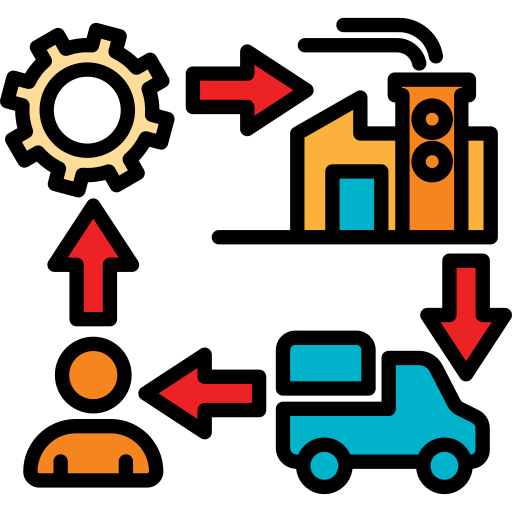

## **Supply Chain Analysis**

### **1.1 Introduction**

This notebook presents a typical supply chain analysis to help solve key shipment and inventory management challenges. It analyzes supply chain inefficiencies and generate insights to inform business stakeholders about potential problems and propose business interventions.

The dataset used in this analysis consists of three data tables:
- orders_and_shipments.csv,
- inventory.csv, and
- fulfillment.csv

More information about the dataset is given below:

**orders_and_shipments.csv**

| Group | Column name | Definition |
|---|---|---|
| Customer | Customer ID | Unique customer identification |
| Customer | Customer Market | Geographic grouping of customer countries, with values such as Europe, LATAM, Pacific Asia, etc. |
| Customer | Customer Region | Geographic grouping of customer countries, with values such as Northern Europe, Western Europe, etc. |
| Customer | Customer Country | Customer's country |
| Order info | Order ID | Unique Order identification. Order groups one or multiple Order Items |
| Order info | Order Item ID | Unique Order Item identification. Order Item always belong to just one Order |
| Order info | Order Year | Year of the order |
| Order information | Order Month | Month of the order |
| Order information | Order Day | Day of the order |
| Order information | Order Time | Timestamp of the order in UTC |
| Order information | Order Quantity | The amount of items that were ordered within a given Order Item (1 record of the data) |
| Product | Product Department | Product grouping into categories such as Fitness, Golf, Pet Shop, etc. |
| Product | Product Category | Product grouping into categories such as Sporting Goods, Women's Apparel, etc. |
| Product | Product Name | The name of the purchased product |
| Sales | Gross Sales | Revenue before discounts generated by the sales of the Order Item (1 record of the data) |
| Sales | Discount % | Discount % applied on the catalog price |
| Sales | Profit | Profit generated by the sales of the Order Item (1 record of data) |
| Shipment information | Shipment Year | Year of the shipment |
| Shipment information | Shipment Month | Month of the shipment |
| Shipment information | Shipment Day | Day of the shipment |
| Shipment information | Shipment Mode | Information on how the shipment has been dispatched, with values as First Class, Same Day, Second Class, etc. |
| Shipment information | Shipment Days - Scheduled | Information on typical amount of days needed to dispatch the goods from the moment the order has been placed |
| Warehouse | Warehouse Country | Country of the warehouse that has fulfilled this order, the only two values being Puerto Rico and USA |

**inventory.csv**

| Group | Column name | Definition |
|---|---|---|
| Inventory & Fulfillment | Warehouse Inventory | The monthly level of inventory of a product, e.g. 930 units |
| Inventory & Fulfillment | Inventory cost per unit | The monthly storage cost per unit of inventory, e.g. $2.07 |

**fulfillment.csv**

| Group | Column name | Definition |
|---|---|---|
| Inventory & Fulfillment | Warehouse Order fulfillment (days) | The average amount of days it takes to refill stock if inventory drops below zero |

### **1.2 Business Questions**

Before delving into detailed analysis, identifying some key business questions for certain stakeholders can help direct the type of analysis required. Below are some stakeholders relevant to the business case and specific business questions that the analysis can help answer.

**Stakeholders:**

**_Sales Manager:_** Overview and keep track of customer’s demand and product sales

=> Dashboard of overall _business performance_ including sales, profit, orders, customers, best product

**_Inventory Manager:_** Control the inventory flow including order fulfillment, stocking and distribution

=> Dashboard of _inventory management_ including warehouse inventory, number of orders from customer, storing cost

**_Shipping Manager:_** Overseeing daily shipping and distribution operations to customers

=> Dashboard of _shipping management_ including orders, location, timing, delay shipping

**Key Questions:**

**Sales Analysis**
- What's the total sales achieved by the company?

- What is the general trend in sales?

- How much profit did the company achieve?

- What is the general profitability trend?

- What is the discount trend?

- Which is the most lucrative market?

- How do the company's products perform in the market?


**Customer Analysis**
- What's the size of the company's customer base?

- What's the general trend in customer base?

- How is the distribution of customers?

- How loyal are the customer?

- What are the shipment preferences by customers?


**Shipment Analysis**
- Assess the punctuality of shipments: Calculate Shipment Processing Days and Shipment Delay?

- What is the proportion of delayed shipments?

- What factors lead to shipment delays?

- Which locations are most affected by shipping delays?

- Visualize how shipments are delayed, by country, product, and over time?


**Product Analysis**
- What products types does the company deal with?

- What are the unique and prominent departments found in the company?

- What are the trends of product sales?

- What's the composition of purchase baskets for the customers?

- How is performance of different products?

- What are the stocking patterns for different products?


**Inventory Analysis**
- What are the sourcing patterns for the company's stock?

- What are the patterns in order quantities across warehouses?

- What are the stocking levels for different products?

- What are the inventory cost levels incurred by the company?

- Analyze products by their supply versus demand ratio?

- Rank products by over or understock?

### **1.3 Import Libraries**


In [99]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### **2. Data Processing**

### 2.1 Loading Data

**Note:** The individual data sheets are shown as .csv files in the Dataset folder under the current repository.

In [40]:
#fulfillment
fulfil = pd.read_csv('fulfillment.csv')

#inventory
inv = pd.read_csv('inventory.csv')

#orders and shipments
ord_ship = pd.read_csv('orders_and_shipments.csv')

In [41]:
# Function to print dataset shape for each dataset in the format - File Name with no extension: Shape

def print_shape(data_list):
  for df in data_list:
    print(df.name + ": " + str(df.shape))

data_list = [fulfil, inv, ord_ship]
# Set the name attribute for each DataFrame
fulfil.name = 'fulfillment'
inv.name = 'inventory'
ord_ship.name = 'orders_and_shipments'

# Print the shapes of the DataFrames
print_shape(data_list)

fulfillment: (118, 2)
inventory: (4200, 4)
orders_and_shipments: (30871, 24)


In [19]:
# Check datasets head
fulfil.head()

,Product Name,Warehouse Order Fulfillment (days)
0,Perfect Fitness Perfect Rip Deck,8.3
1,Nike Men's Dri-FIT Victory Golf Polo,6.6
2,O'Brien Men's Neoprene Life Vest,5.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
4,Under Armour Girls' Toddler Spine Surge Runni,6.3


In [20]:
inv.head()

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648


In [21]:
ord_ship.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200


### 2.2 Data cleaning

In [42]:
# Function to print information for each dataset. Separate each dataset information with ==== line covering the page width

def print_info(data_list):
  for df in data_list:
    print(df.name)
    print(df.info())
    print("="*80)

print_info(data_list)


fulfillment
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product Name                          118 non-null    object 
 1    Warehouse Order Fulfillment (days)   118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB
None
inventory
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             4200 non-null   object 
 1    Year Month              4200 non-null   int64  
 2    Warehouse Inventory     4200 non-null   int64  
 3   Inventory Cost Per Unit  4200 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.4+ KB
None
orders_and_shipments
<class 'pandas.core.frame.Dat

In [43]:
# function to check duplicated data in all the three datasets

def check_duplicates(data_list):
  for df in data_list:
    print(df.name)
    duplicates = df.duplicated().sum()
    if duplicates > 0:
      print(f"Number of duplicate rows: {duplicates}")
    else:
      print("No duplicate rows found.")
    print("="*80)

check_duplicates(data_list)


fulfillment
No duplicate rows found.
inventory
No duplicate rows found.
orders_and_shipments
No duplicate rows found.


**Observations:**
- There're no missing values in all three datasets,

- There're no duplicate values across all datasets,

- There're some white spaces _(leading and trailing spaces)_ in the column names and we should trim them,

- There're some unecessary columns in the dataset, e.g, the Order Item ID column show the ID of the product in the _order_and_shipment_ table but it is not shown in the _fulfillment_ and _inventory_ table, So we must drop this column.

In [44]:
#function to trip leading and trailing spaces in columns across all datasets

def trim_spaces_in_columns(data_list):
  """
  Trims leading and trailing spaces in column names across all datasets.

  Args:
    data_list: A list of pandas DataFrames.
  """
  for df in data_list:
    df.columns = df.columns.str.strip()


In [45]:
#function to display all columns for each dataset to check that leading and trailing spaces are trimmed

def display_columns(data_list):
  """
  Displays all columns for each dataset, ensuring that the listed columns do not exceed a page width.

  Args:
    data_list: A list of pandas DataFrames.
  """
  for df in data_list:
    print(df.name)
    print("Columns:")
    columns = df.columns.tolist()

    # Split the columns into chunks to fit within a page width
    chunk_size = 6  # Adjust as needed
    for i in range(0, len(columns), chunk_size):
      print("  ", columns[i:i + chunk_size])
    print("=" * 90)


In [47]:
# apply trim and display functions to the three datasets

trim_spaces_in_columns(data_list)
display_columns(data_list)


fulfillment
Columns:
   ['Product Name', 'Warehouse Order Fulfillment (days)']
inventory
Columns:
   ['Product Name', 'Year Month', 'Warehouse Inventory', 'Inventory Cost Per Unit']
orders_and_shipments
Columns:
   ['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year', 'Order Month', 'Order Day']
   ['Order Time', 'Order Quantity', 'Product Department', 'Product Category', 'Product Name', 'Customer ID']
   ['Customer Market', 'Customer Region', 'Customer Country', 'Warehouse Country', 'Shipment Year', 'Shipment Month']
   ['Shipment Day', 'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales', 'Discount %', 'Profit']


In [ ]:
#drop unecessary columns
ord_ship = ord_ship.drop(['Order Item ID','Order Time'], axis=1)
ord_ship.columns

Index(['Order ID', 'Order YearMonth', 'Order Year', 'Order Month', 'Order Day',
       'Order Quantity', 'Product Department', 'Product Category',
       'Product Name', 'Customer ID', 'Customer Market', 'Customer Region',
       'Customer Country', 'Warehouse Country', 'Shipment Year',
       'Shipment Month', 'Shipment Day', 'Shipment Mode',
       'Shipment Days - Scheduled', 'Gross Sales', 'Discount %', 'Profit'],
      dtype='object')

Some columns contain wrong data types and should be changed:

- ord_ship['Discount'] : is string instead of float

- time features have datatype of int64 stead of string value : order[['Order Year','Order Month','Order Day','Shipment Year','Shipment Month','Shipment Day']

- monetary value columns ord_ship['Gross Sales','Profit']: are datatype int64 instead of float

In [49]:
# sample Discount %

print(ord_ship['Discount %'].sample(40))


12821    0.06
5944     0.01
25020     0.2
29409    0.03
20634    0.01
22162    0.09
18302    0.09
20264    0.01
6031     0.02
27647    0.04
702      0.02
15015    0.05
10813    0.04
2771     0.18
18992    0.25
12373    0.07
29195    0.12
22338    0.01
18432    0.07
22209    0.04
24028    0.12
23618    0.07
30194    0.07
1633      0.2
4358     0.25
1576     0.05
7057     0.06
3331     0.05
799      0.09
8421      0.2
2390      0.2
7147     0.01
15467    0.06
9473     0.18
19910    0.16
5011      0.2
7331     0.15
3800     0.01
16684    0.18
3593     0.06
Name: Discount %, dtype: object


Discount % contains "-" values and should be replaced with "0"

In [50]:
# replace '-' values with '0' in Discount

ord_ship['Discount %'] = ord_ship['Discount %'].str.replace('-', '0')


In [51]:
# convert Discount into float

ord_ship['Discount %'] = ord_ship['Discount %'].astype(float)


In [52]:
# check if Discount % contains atleast 0

if (ord_ship['Discount %'] >= 0).all():
  print("Discount % contains at least 0.")
else:
  print("Discount % does not contain at least 0.")


Discount % contains at least 0.


In [53]:
# check Discount % data type

print(ord_ship['Discount %'].dtype)


float64


Time feature columns

In [54]:
#change the datatype of time feature columns
ord_ship[['Order Year','Order Month','Order Day','Shipment Year','Shipment Month','Shipment Day']] = ord_ship[['Order Year','Order Month',
                                                                                                               'Order Day','Shipment Year',
                                                                                                               'Shipment Month','Shipment Day']].astype(str)

In [55]:
#check datatypes for ord_ship['Order Year','Order Month','Order Day','Shipment Year','Shipment Month','Shipment Day']

print(ord_ship[['Order Year','Order Month','Order Day','Shipment Year','Shipment Month','Shipment Day']].dtypes)


Order Year        object
Order Month       object
Order Day         object
Shipment Year     object
Shipment Month    object
Shipment Day      object
dtype: object


Monetary value columns-  Gross Sales and Profit in _order_and_shipment_

In [56]:
#change the datatype of Gross Sales and Profit columns
ord_ship[['Gross Sales','Profit']] = ord_ship[['Gross Sales','Profit']].astype(float)

In [57]:
# check datatype for ord_ship['Gross Sales','Profit']

print(ord_ship[['Gross Sales', 'Profit']].dtypes)


Gross Sales    float64
Profit         float64
dtype: object


Formatting the Customer Country column.

In [58]:
ord_ship['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican�Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d�Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Per�', 'Algeria�', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulg

The data entries contain some special characters, e.g, Peru has the special characters for letter "u" and should be reformatted.

In [59]:
#replace the special characters in the Customer Country column
ord_ship['Customer Country'] = ord_ship['Customer Country'].replace({
    'Dominican�Republic': 'Dominican Republic',
    'Cote d�Ivoire': 'Cote d Ivoire', # Added a comma at the end of this line
    'Per�': 'Peru',
    'Algeria�': 'Algeria',
    'Israel�':'Israel',
    'Ben�n': 'Benin'
})
ord_ship['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Peru', 'Algeria', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulga

Checking for which product category and product department the product name belongs to

In [60]:
# Creating a new DataFrame with isolated columns
prod_info = ord_ship[['Product Name', 'Product Category', 'Product Department']]
#Drop the duplicates to have the distinct product names
product = prod_info.drop_duplicates()
product

,Product Name,Product Category,Product Department
0,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop
157,Pelican Sunstream 100 Kayak,Water Sports,Fan Shop
294,Diamondback Women's Serene Classic Comfort Bi,Camping & Hiking,Fan Shop
418,O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,Fan Shop
463,Team Golf Texas Longhorns Putter Grip,Accessories,Outdoors
...,...,...,...
15458,First aid kit,Health and Beauty,Health and Beauty
15464,Rock music,Music,Discs Shop
15621,Men's gala suit,Men's Clothing,Apparel
18869,Toys,Toys,Fan Shop


In [61]:
# Export the new DataFrame (product) to a new CSV file
product.to_csv('product.csv', index=False)

The inventory table only has the storage cost for each product name.

We merge the _product_ table and the _inventory_ table with the key = Product Name so that we're able to know the average storage cost for each product category and product department

In [62]:
# print inventory dataset
inv

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648
...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,201501,0,1.44662
4196,Ogio Race Golf Shoes,201501,0,0.10310
4197,GolfBuddy VT3 GPS Watch,201501,0,1.77747
4198,Titleist Small Wheeled Travel Cover,201501,0,0.15244


In [63]:
# print product dataset
product

,Product Name,Product Category,Product Department
0,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop
157,Pelican Sunstream 100 Kayak,Water Sports,Fan Shop
294,Diamondback Women's Serene Classic Comfort Bi,Camping & Hiking,Fan Shop
418,O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,Fan Shop
463,Team Golf Texas Longhorns Putter Grip,Accessories,Outdoors
...,...,...,...
15458,First aid kit,Health and Beauty,Health and Beauty
15464,Rock music,Music,Discs Shop
15621,Men's gala suit,Men's Clothing,Apparel
18869,Toys,Toys,Fan Shop


In [64]:
inv_prod = pd.merge(inv, product, on='Product Name', how='left')
inv_prod

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517,Cleats,Apparel
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291,Women's Apparel,Golf
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531,Indoor/Outdoor Games,Fan Shop
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321,Cardio Equipment,Footwear
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648,Shop By Sport,Golf
...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,201501,0,1.44662,Golf Gloves,Outdoors
4196,Ogio Race Golf Shoes,201501,0,0.10310,Golf Bags & Carts,Outdoors
4197,GolfBuddy VT3 GPS Watch,201501,0,1.77747,Kids' Golf Clubs,Outdoors
4198,Titleist Small Wheeled Travel Cover,201501,0,0.15244,Golf Gloves,Outdoors


**Check null values**

In [65]:
#Checking the missing value
null_count = inv_prod.isna().sum()
null_count

,0
Product Name,0
Year Month,0
Warehouse Inventory,0
Inventory Cost Per Unit,0
Product Category,175
Product Department,175


In [66]:
# print the null records
null_rec = inv_prod[(inv_prod['Product Category'].isna()) | (inv_prod['Product Department'].isna())]
null_rec

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
56,Dell Laptop,201712,14,1.56369,NaN,NaN
114,SOLE E35 Elliptical,201712,1,0.36106,NaN,NaN
115,Bushnell Pro X7 Jolt Slope Rangefinder,201712,9,2.22684,NaN,NaN
116,SOLE E25 Elliptical,201712,23,1.84297,NaN,NaN
117,Bowflex SelectTech 1090 Dumbbells,201712,36,1.49431,NaN,NaN
...,...,...,...,...,...,...
4068,Dell Laptop,201502,37,2.16324,NaN,NaN
4126,SOLE E35 Elliptical,201502,3,1.85317,NaN,NaN
4127,Bushnell Pro X7 Jolt Slope Rangefinder,201502,35,1.22691,NaN,NaN
4128,SOLE E25 Elliptical,201502,18,1.07032,NaN,NaN


In [67]:
# check unique products with null records
null_rec['Product Name'].unique()

array(['Dell Laptop', 'SOLE E35 Elliptical',
       'Bushnell Pro X7 Jolt Slope Rangefinder', 'SOLE E25 Elliptical',
       'Bowflex SelectTech 1090 Dumbbells'], dtype=object)

- Five (5) products appear in the _inventory_ table but not in the _order_ table.

- The five products are in the company's inventory but have not been ordered by the customers.

- It's impossible to determine which product category and product department those product names belong to

- These products account for a considerable amount of storage cost and should be kept in inventory records.

In [68]:
# replacing null values with 'None'
inv_prod['Product Category'].fillna('None', inplace=True)
inv_prod['Product Department'].fillna('None', inplace=True)
inv_prod[inv_prod['Product Department'].isna()]

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department


### 2.3 Feature Engineering

Feature metrics help us to further analyze inventory management, Shipement delay and many more.

### *2.3.1 Creating datetime features*

In [69]:
from datetime import datetime
#Create order date and shipment date features from the year, month, day column
ord_ship['Order Date'] = ord_ship['Order Year'].astype(str) + '/' + ord_ship['Order Month'].astype(str) + '/' + ord_ship['Order Day'].astype(str)
ord_ship['Order Date'] = pd.to_datetime(ord_ship['Order Date'])
ord_ship['Order Date'] = ord_ship['Order Date'].dt.strftime('%Y/%m/%d')
ord_ship['Order YearMonth'] = ord_ship['Order YearMonth'].astype(str)

ord_ship['Shipment Date'] = ord_ship['Shipment Year'].astype(str) + '/' + ord_ship['Shipment Month'].astype(str) + '/' + ord_ship['Shipment Day'].astype(str)
ord_ship['Shipment Date'] = pd.to_datetime(ord_ship['Shipment Date'])
ord_ship['Shipment Date'] = ord_ship['Shipment Date'].dt.strftime('%Y-%m-%d')
ord_ship['Shipment YearMonth'] = ord_ship['Shipment Year'].astype(str) + '-' + ord_ship['Shipment Month'].astype(str)

In [70]:
inv_prod['Year Month']=pd.to_datetime(inv_prod['Year Month'], format='%Y%m').dt.strftime('%Y/%m')
inv_prod

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf
...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors


### *2.3.2 Creating shipment time feature*

**Shipment Delay**

Shipment Delay is a metric that measures the time difference between the expected shipment date and the actual date that the order is delivered to the customer. This helps identify and measure the efficiency and reliability of the shipping processes.

The calculation of Shipment Delay involves comparing the `Shipment Days` - `Actual (actual date the order is shipped)` with the `Shipment Days` - `Scheduled (the expected or planned date of shipment)`.

Shipment Delay in Days

Shipment Delay = [Shipment Days - Actual] - ['Shipment Days - Scheduled']

In [71]:
#Create shipping time feature
ord_ship['Shipping Time'] = pd.to_datetime(ord_ship['Shipment Date']) - pd.to_datetime(ord_ship['Order Date'])
ord_ship['Shipping Time'] = ord_ship['Shipping Time'].dt.days

#Create delay shipment feature
def calculate_delay(row):
    if row['Shipping Time'] > row['Shipment Days - Scheduled']:
        return 'Late'
    else:
        return 'On time'

ord_ship['Delay Shipment'] = ord_ship.apply(calculate_delay, axis=1)
ord_ship

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Standard Class,4,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Standard Class,4,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Standard Class,4,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Standard Class,4,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Standard Class,4,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,201712,2017,12,5,04:59,1,Fan Shop,Toys,...,Standard Class,4,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late
30867,7908,19762,201504,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,...,Standard Class,4,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time
30868,29326,73368,201603,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,...,Second Class,2,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time
30869,63308,158284,201707,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,...,Second Class,2,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late


In [72]:
ord_ship['Shipping Time'].describe()

,Shipping Time
count,30871.000000
mean,3.560753
std,131.195817
min,-975.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,978.000000


In [76]:
# drawing a box plot for 'Shipping Time' for the ord_ship dataset using plotly.express

import plotly.express as px

fig = px.box(ord_ship, y="Shipping Time", title="Shipping Time Distribution",
             color_discrete_sequence=['indianred'])
fig.update_layout(
    yaxis_title="Shipping Time (Days)",
    xaxis_title="",
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    plot_bgcolor="white",
    paper_bgcolor="white"
)
fig.update_traces(marker_color='indianred', boxmean=True)
fig.show()


**Insights**

- There are negative values in the Shipping Time column.

- The negative values are due to errors in recording since the Shipment Date is less than Order Date.

- We also observe unusually large values. Standard shipping within the same country normally take anywhere from 2 to 7 business days. International standard shipping can take longer, often ranging from 1 to 4 weeks.
**NB:** Using this standard, we drop the shipping time values that below 0 and greater than 28

In [79]:
#dropping abnormal Shipping Time
order = ord_ship[(ord_ship['Shipping Time'] >= 0) & (ord_ship['Shipping Time'] <= 28)]
order

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Standard Class,4,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Standard Class,4,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Standard Class,4,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Standard Class,4,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Standard Class,4,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,201712,2017,12,5,04:59,1,Fan Shop,Toys,...,Standard Class,4,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late
30867,7908,19762,201504,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,...,Standard Class,4,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time
30868,29326,73368,201603,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,...,Second Class,2,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time
30869,63308,158284,201707,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,...,Second Class,2,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late


### *2.3.3 Creating business performance features [Net Sales and Unit Price]*

In [82]:
#Create net sales and unit price feature
order['Net Sales'] = order['Gross Sales'] - order['Gross Sales'] * order['Discount %']
order['Unit Price'] = order['Gross Sales'] / order['Order Quantity']
order

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late,300.00,400.0
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time,364.00,400.0
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time,376.00,400.0
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time,340.00,400.0
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time,348.00,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,201712,2017,12,5,04:59,1,Fan Shop,Toys,...,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late,11.28,12.0
30867,7908,19762,201504,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,...,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time,26.40,30.0
30868,29326,73368,201603,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,...,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time,27.30,30.0
30869,63308,158284,201707,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,...,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late,147.00,150.0


### *2.3.4 Total Inventory Storage Cost*

Total Cost of Inventory is a significant financial metric in supply chain management that calculates the overall cost associated with holding and managing inventory.

The formula for calculating Total Inventory Cost is: `Warehouse Inventory` times `Inventory Cost per Unit`.

In [83]:
#Create storage cost feature
inv = inv_prod
inv['Storage Cost'] = inv['Inventory Cost Per Unit']*inv['Warehouse Inventory']
inv

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


### *2.3.5 Profit Margin*

Profit Margin helps to assessing the profitability of the supply chain operations. It provides insights into the effectiveness of cost control and pricing strategies, enabling organizations to make adjustments to enhance overall profitability.

`Profit Margin : Total Profit / Total Gross Sales *100`

### *2.3.6 Inventory to Sales Delta*

This is metric which indicating how efficiently inventory is managed and whether there may be overstocking or understocking issues, allowing for more informed decisions to optimize inventory levels.

`Inventory to Sales Delta = Total Warehouse Inventory - Total Order Quantity`

### *2.6.7 Under or Overstock*

Under or Overstock helps to find which products are Overstock and which are understock. And it helps to the balance of inventory.

`Under or Overstock = Inventory to Sales Delta >0 THEN 'Overstock' ELSE 'Understock'`

### **3. Exploratory Data Analysis**

Now that the data is clean, we focus on analyzing the characteristics, behaviors, pattern and trends in order to gain business insights. The following criteria governs the EDA process: **Business Performance; Customer; Product; Inventory; Shipment**

### 3.1 Business Performance

In [84]:
#overall descriptive analysis of the business sales' key metrics
order[['Order Quantity','Unit Price','Gross Sales','Net Sales','Discount %','Profit']].describe()

,Order Quantity,Unit Price,Gross Sales,Net Sales,Discount %,Profit
count,25861.000000,25861.000000,25861.000000,25861.000000,25861.000000,25861.000000
mean,2.097135,139.907506,198.150884,178.030088,0.101419,126.304513
std,1.451910,122.281886,111.770964,101.533400,0.070553,50.656121
min,1.000000,10.000000,10.000000,8.250000,0.000000,6.000000
25%,1.000000,50.000000,120.000000,105.600000,0.040000,97.000000
50%,1.000000,65.000000,200.000000,164.000000,0.090000,125.000000
75%,3.000000,200.000000,300.000000,245.000000,0.160000,147.000000
max,5.000000,533.000000,533.000000,533.000000,0.250000,258.000000


The Unit Price has mean of about 139 but the maximum value is up to five times at 533. Therefore, we should check for the outliner of the Unit Price column.

In [86]:
# boxplot for 'Unit Price' for order dataset using plotly library

fig = px.box(order, y="Unit Price", title="Unit Price Distribution",
             color_discrete_sequence=['indianred'])
fig.update_layout(
    yaxis_title="Unit Price",
    xaxis_title="",
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    plot_bgcolor="white",
    paper_bgcolor="white"
)
fig.update_traces(marker_color='indianred', boxmean=True)
fig.show()


There are outliners which need to be checked

In [87]:
#Show the recording of the outliners
order[order['Unit Price'] > 400]

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
9387,71926,175241,201711,2017,11,15,22:31,1,Outdoors,Garden,...,533.0,0.06,258.0,2017/11/15,2017-11-17,2017-11,2,On time,501.02,533.0
14936,69546,172861,201710,2017,10,11,02:47,1,Technology,Cameras,...,452.0,0.17,219.0,2017/10/11,2017-10-14,2017-10,3,On time,375.16,452.0
14937,69656,172971,201710,2017,10,12,04:42,1,Technology,Cameras,...,452.0,0.15,219.0,2017/10/12,2017-10-14,2017-10,2,On time,384.20,452.0
14938,69665,172980,201710,2017,10,13,19:14,1,Technology,Cameras,...,452.0,0.03,219.0,2017/10/13,2017-10-15,2017-10,2,Late,438.44,452.0
14939,69823,173138,201710,2017,10,14,22:34,1,Technology,Cameras,...,452.0,0.07,219.0,2017/10/14,2017-10-16,2017-10,2,On time,420.36,452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28877,75091,178406,201712,2017,12,9,02:31,1,Outdoors,Garden,...,533.0,0.03,258.0,2017/12/09,2017-12-13,2017-12,4,Late,517.01,533.0
28910,71801,175116,201711,2017,11,11,15:31,1,Outdoors,Garden,...,533.0,0.05,258.0,2017/11/11,2017-11-13,2017-11,2,Late,506.35,533.0
28911,71978,175293,201711,2017,11,11,21:29,1,Outdoors,Garden,...,533.0,0.09,258.0,2017/11/11,2017-11-16,2017-11,5,Late,485.03,533.0
28912,71985,175300,201711,2017,11,13,12:01,1,Outdoors,Garden,...,533.0,0.01,258.0,2017/11/13,2017-11-18,2017-11,5,Late,527.67,533.0


The majority of the outliners are electronic items which usually have higher prices than most product items. Therefore, we'll not exclude the outliers.

**Total net sales, Profit and Profit margin for the company**

In [92]:
# # Calculate Total Net Sales, Total Profit, and Profit Margin

total_net_sales = order['Net Sales'].sum()
total_profit = order['Profit'].sum()
profit_margin = (total_profit / total_net_sales) * 100

print("Total Net Sales:", "{:,.2f}".format(total_net_sales))
print("=" * 40)
print("Total Profit:", "{:,.2f}".format(total_profit))
print("=" * 40)
print("Profit Margin:", "{:,.2f}%".format(profit_margin))


Total Net Sales: 4,604,036.11
Total Profit: 3,266,361.00
Profit Margin: 70.95%


**Insights:**
- The company had an impressive business performance over the past 3 years,

- Net sales stood at about 4.6 million,

- Total profit recorded is 3.2 million,

- The company's profit margin is very good; up to about 71%.

**Average net sales and profit per month**

In [93]:
# Average_net_sales and average_profit per month

average_net_sales = total_net_sales / 37
average_profit = total_profit / 37

print("Average Net Sales per Month:", "{:,.2f}".format(average_net_sales))
print("=" * 40)
print("Average Profit per Month:", "{:,.2f}".format(average_profit))


Average Net Sales per Month: 124,433.41
Average Profit per Month: 88,280.03


The company has average net sales of about 124k and profit of about 88k per month

**Net sales and profit trend over time**

<Axes: xlabel='Shipment YearMonth', ylabel='Profit Margin'>

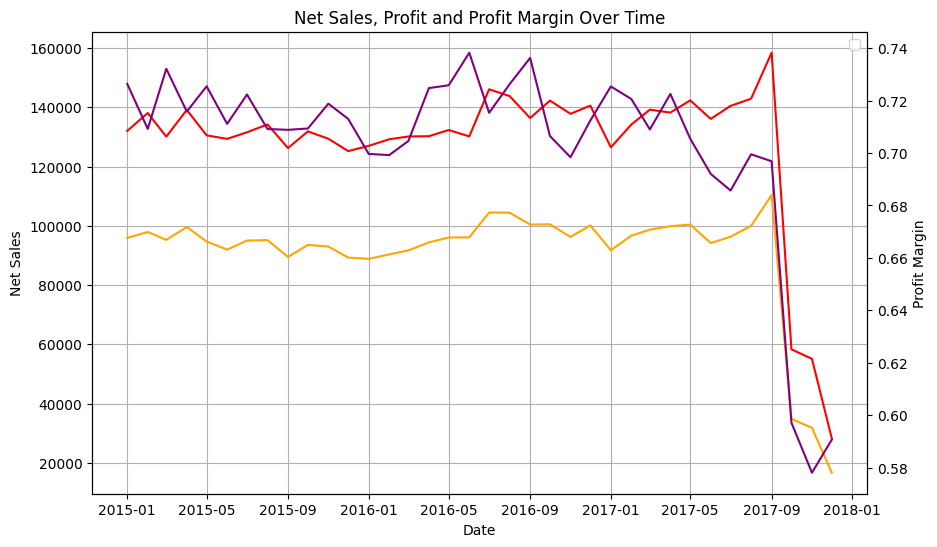

In [100]:
order['Shipment YearMonth'] = pd.to_datetime(order['Shipment YearMonth'], format='%Y-%m')

# Group data by year and month, and calculate the metrics
sales = order.groupby(['Shipment YearMonth']).agg({'Net Sales':'sum',
                                                'Profit':'sum'})
sales['Profit_margin'] = sales['Profit'] / sales['Net Sales']

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Shipment YearMonth',y='Net Sales', data = sales, color='red')
sns.lineplot(x='Shipment YearMonth',y='Profit', data = sales, color='orange')
plt.xlabel('Date')
plt.title('Net Sales, Profit and Profit Margin Over Time')
plt.legend()
plt.grid(True)

# Create a secondary y-axis
ax2 = plt.gca().twinx()
ax2.set_ylabel('Profit Margin')
sns.lineplot(x='Shipment YearMonth', y='Profit_margin', data=sales, color='purple', ax=ax2)

**Insights:**

- The company had a steady good business performance from Jan 2015 until Sept 2017 when net sales profit margin began a sharp decline.

- Net sales went sideway for a long time before plummeting by 70% in Q4/2017. The same trend also happened with Profit during that period.

- Although the Profit Margin has decresed by 30%, it was still a pretty good profit margin of nearly 60%.

**Trend in number of orders over time**

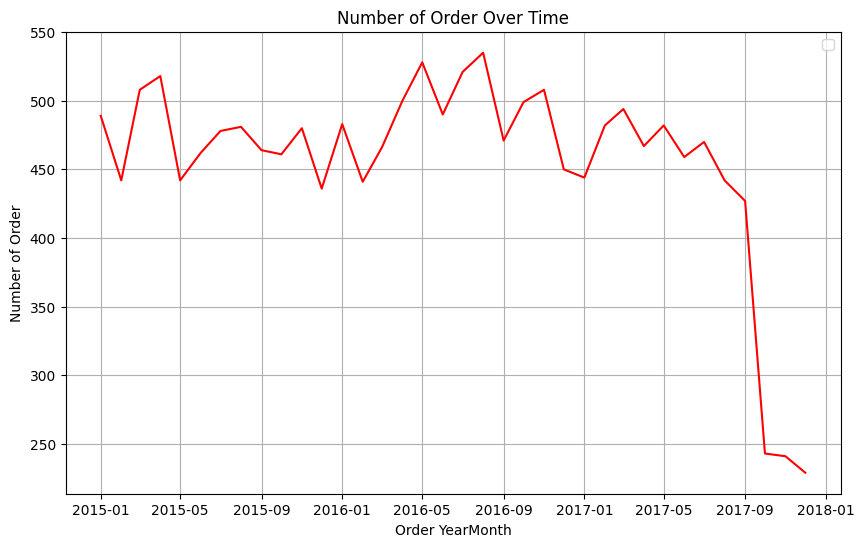

In [97]:
order['Order YearMonth'] = pd.to_datetime(order['Order YearMonth'], format='%Y%m')

# Group data by year and month, and calculate the metrics
demand = order.groupby(['Order YearMonth'])['Order ID'].nunique().reset_index()
datetime# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth', y='Order ID', data=demand, color='red')
plt.ylabel('Number of Order')
plt.title('Number of Order Over Time')
plt.legend()
plt.grid(True)

**Insights:**

- The number of orders also witnessed a sharp decline of about 85% in Q4/2017

**Take away:** The number of order decrease significantly leading to the sharp decline in net sales and profit. In addition, both net sales and profits decline at the same time by the relative same amount, indicating that costs are unlikely to change and the company is actually facing serious problems from the revenue side

**Average Order Quantity and Average Unit Price trend over time**

<Axes: xlabel='Order YearMonth', ylabel='Unit Price'>

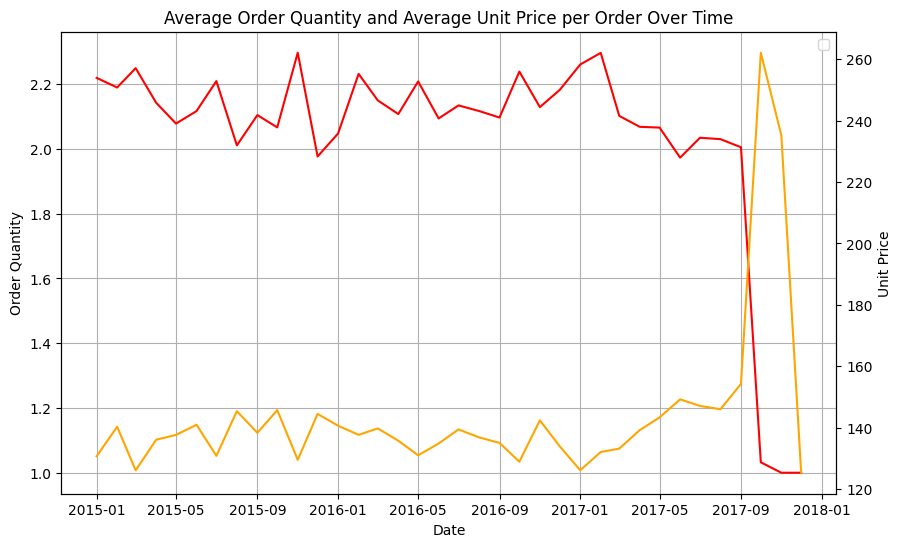

In [101]:
order['Order YearMonth'] = pd.to_datetime(order['Order YearMonth'], format='%Y/%m')

# Group data by year and month, and calculate the metrics
demand = order.groupby(['Order YearMonth']).agg({'Order Quantity':'mean',
                                                'Unit Price':'mean'})

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y='Order Quantity', data = demand, color='red')
plt.xlabel('Date')
plt.title('Average Order Quantity and Average Unit Price per Order Over Time')
plt.legend()
plt.grid(True)

# Create a secondary y-axis
ax2 = plt.gca().twinx()
ax2.set_ylabel('Unit Price')
sns.lineplot(x='Order YearMonth',y='Unit Price', data = demand, color='orange')

It is more interesting when we look at average order quantity and average unit price per order over time, the two main factors that contribute to the average value of an order. While the average order quantity decreased, the average unit price rebounded strongly in 10/2017 (nearly doubled) but then also dropped sharply.

**Which product departments account for the majority of net sales and number of orders?**

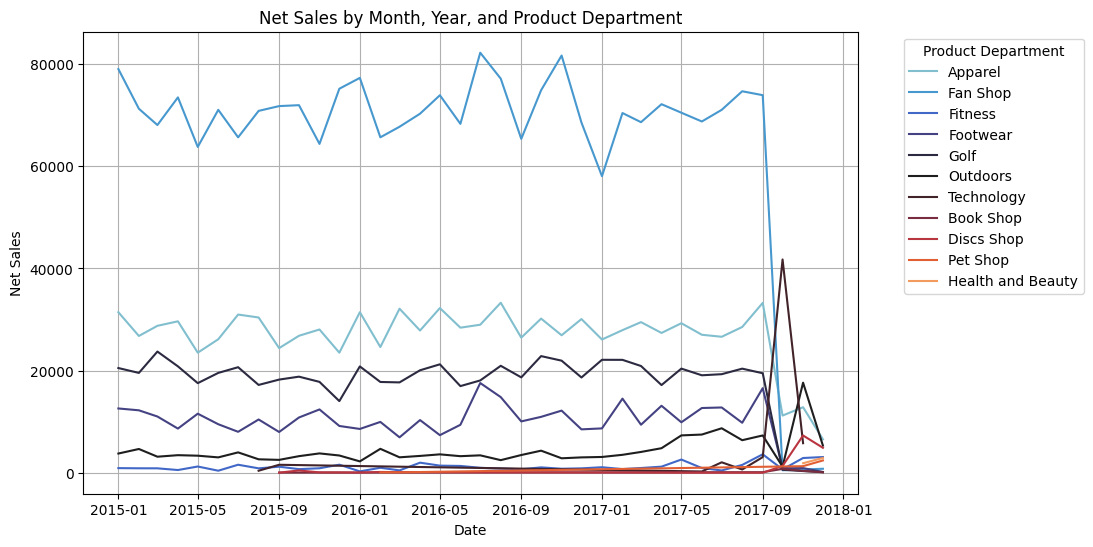

In [102]:
# Group data by year and month, and calculate the metrics
product_sales = order.groupby(['Order YearMonth','Product Department'])['Net Sales'].sum().reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y = 'Net Sales', data = product_sales, hue='Product Department', palette='icefire')

plt.xlabel('Date')
plt.title('Net Sales by Month, Year, and Product Department')
plt.legend(title = 'Product Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

Apparel, Fanshop, Footwear and Golf are the product departments that contributed the most to the net sales. However, in Q4/2017, revenue from these product departments has suddenly plummeted and almost disappeared. Meanwhile, the product departments such as Technology and Discs Shop showed potential growth with increasing net sales

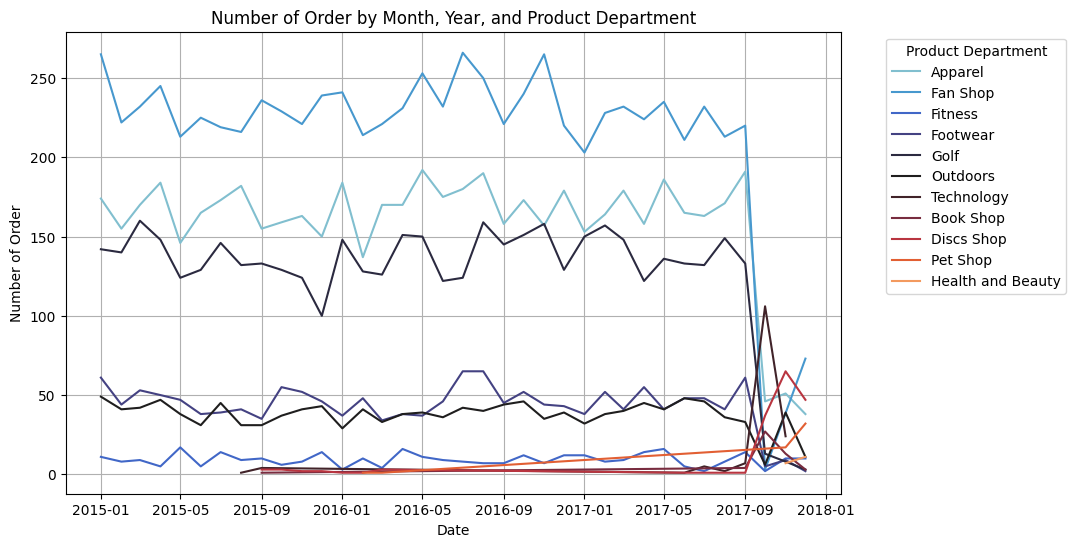

In [103]:
# Group data by year and month, and calculate the metrics
product_sales = order.groupby(['Order YearMonth','Product Department'])['Order ID'].nunique().reset_index()
product_sales['Number of Order'] = product_sales['Order ID']
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y = 'Number of Order', data = product_sales, hue='Product Department', palette='icefire')
plt.xlabel('Date')
plt.title('Number of Order by Month, Year, and Product Department')
plt.legend(title = 'Product Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

The same trend also occurs when we count the number of orders for each product department over time

**Take away:** Looking deeper into the product department, we can better gain insights into the decline of the business activities. The absence of the old leading - best selling items (Apparel, Fanshop, Footwear, Golf), which had been instrumental to the company’s success, was closely linked to this downturn.

### 3.2 Customer Analysis

**Distribution of customers by country and market**

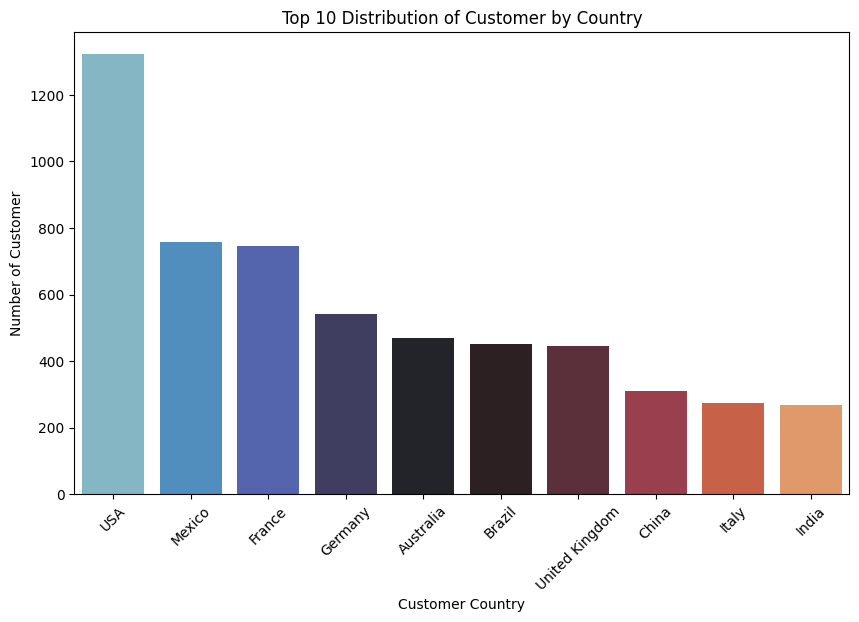

In [104]:
# Group data by year and month, and calculate the metrics
customer = order.groupby(['Customer Country'])['Customer ID'].nunique().reset_index()
customer['Number of Customer'] = customer['Customer ID']  # Corrected line
customer = customer.sort_values(by='Number of Customer',ascending=False).reset_index(drop=True)
top_10 = customer[['Customer Country','Number of Customer']].head(10)

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data = top_10, x= 'Customer Country', y='Number of Customer', palette= 'icefire')
plt.title('Top 10 Distribution of Customer by Country')
plt.xticks(rotation = 45)
plt.show()

In [113]:
# customer distribution by market

import plotly.graph_objects as go

customer = order.groupby(['Customer Market'])['Customer ID'].nunique().reset_index()
customer['Number of Customer'] = customer['Customer ID']

fig = go.Figure(data=[go.Pie(labels=customer['Customer Market'], values=customer['Number of Customer'],
                             pull=[0.1, 0, 0, 0], # Pull out the first slice
                             textinfo='percent+label',
                             textfont_size=15)])

fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  marker=dict(line=dict(color='#000000', width=2)))

fig.update_layout(title='Distribution of Customers by Market',
                  title_font_size=20,
                  width=800,
                  height=600)

fig.update_layout(
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    plot_bgcolor="white",
    paper_bgcolor="white"
)


fig.show()


The majority of customers come from LATAM, North America, Western Europe and Asia Pacific region. In which, customers from USA are much higher than other countries

**Number of customers over time**

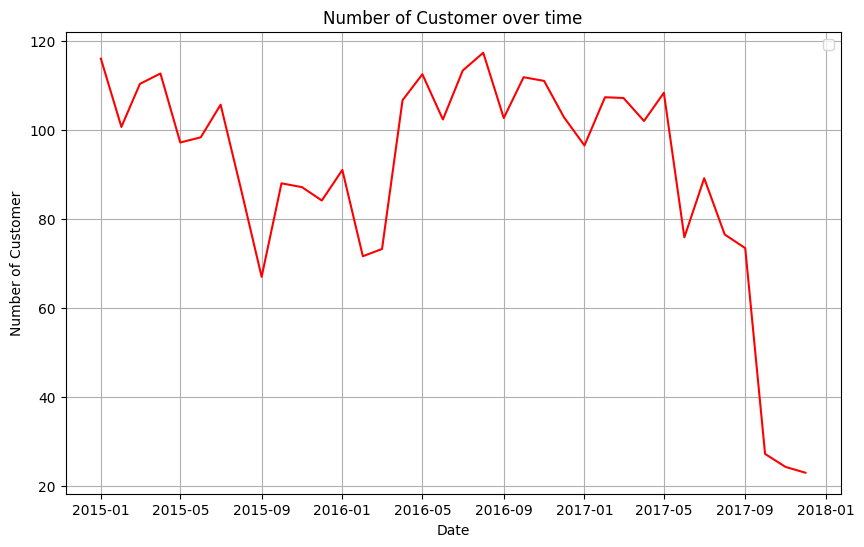

In [114]:
# Group data by year and month, and calculate the metrics
customer = order.groupby(['Order YearMonth','Product Department'])['Customer ID'].nunique().reset_index()
customer['Number of Customer'] = customer['Customer ID']
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y = 'Number of Customer', data = customer, color ='red', ci=None)
plt.xlabel('Date')
plt.title('Number of Customer over time')
plt.legend()
plt.grid(True)

plt.show()

The number of customers per month ranges around 100 to 140. However, this number has decreased to below 100 between the end of 2015 and the beginning of 2016. Besides, a sharp decrease in the fourth quarter of 2017 confirmed for a drop in number of orders and a serious problem from the revenue side

**Buying behavior over time**

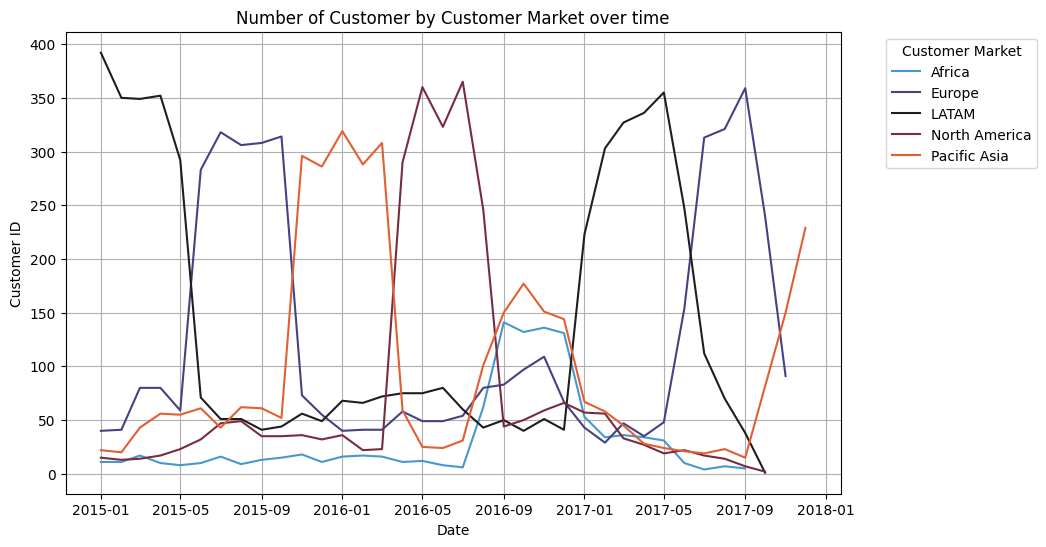

In [115]:
# Group data by year and month, and calculate the metrics
customer = order.groupby(['Order YearMonth','Customer Market'])['Customer ID'].nunique().reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y = 'Customer ID', data = customer, hue='Customer Market', palette='icefire')

plt.xlabel('Date')
plt.title('Number of Customer by Customer Market over time')
plt.legend(title = 'Customer Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

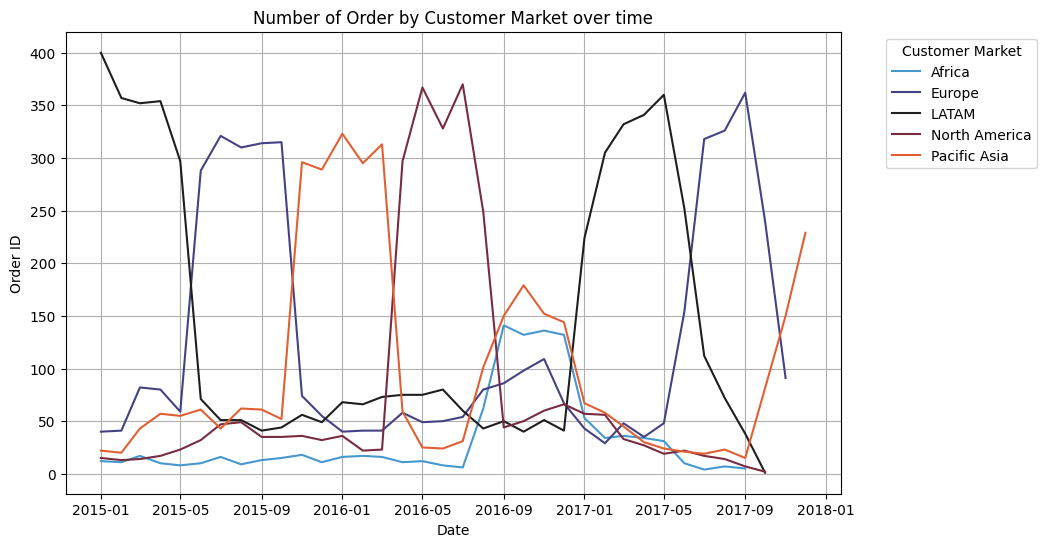

In [116]:
# Group data by year and month, and calculate the metrics
customer = order.groupby(['Order YearMonth','Customer Market'])['Order ID'].nunique().reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y = 'Order ID', data = customer, hue='Customer Market', palette='icefire')

plt.xlabel('Date')
plt.title('Number of Order by Customer Market over time')
plt.legend(title = 'Customer Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

As you can see, there is a certain trend in the buying behavior of customers from different continents. Over time, the tendency to buy more often occurs in the LATAM, then in turn to Europe, Pacific Asia, North America and Africa. This trend continues to repeat from the LATAM

In [119]:
# Group data by year and month, and calculate the metrics
order['Order Month'] = order['Order Month'].astype(int)
customer = order.groupby(['Order Month'])['Order ID'].nunique().reset_index()
customer = customer.sort_values(by='Order Month', ascending=False)

# Create a Plotly bar chart with multiple colors
import plotly.express as px

fig = px.bar(customer, x='Order Month', y='Order ID', color='Order Month',
             title='Number of Orders per Month',
             labels={'Order Month': 'Month', 'Order ID': 'Number of Orders'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()


In [120]:
# Group data by year and month, and calculate the metrics
order['Order Day'] = order['Order Day'].astype(int)
customer = order.groupby(['Order Day'])['Order ID'].nunique().reset_index()
customer = customer.sort_values(by='Order Day', ascending=False)

# Create a Plotly bar chart with multiple colors
fig = px.bar(customer, x='Order Day', y='Order ID', color='Order Day',
             title='Number of Orders per Day',
             labels={'Order Day': 'Day', 'Order ID': 'Number of Orders'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()


The number of orders by month does not has any significant difference.
In terms of days, customers usually order more in the middle of the month


**Take away:** Although over time, the buying haviour from key customer market has changed significantly, but the demand for ordering does not seem to have a strong fluctuation

### 3.3 Product Analysis

**Most preferred product categories and product names**

In [129]:
# Group data by Product Category and calculate the number of orders
prefer = order.groupby(['Product Category'])['Order ID'].nunique().reset_index()
prefer = prefer.sort_values(by='Order ID', ascending=False)

# Create a Plotly bar chart with multiple colors
fig = px.bar(prefer, x='Product Category', y='Order ID', color='Product Category',
             title='Number of Orders per Product Category',
             labels={'Product Category': 'Product Category', 'Order ID': 'Number of Orders'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

fig.show()


Cleats, Fishing, Camping & Hiking, Water Sports, Indoor/Outdoor Games, Women’s Apparel, Men’s Footwear, Shop by Sports and Cardio Equipment are the top 9 product categories with outstanding number of orders, completely overwhelm other categories. For less popular categories, Electronics outperforms the others

In [122]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
prefer = order.groupby(['Product Name'])['Order ID'].nunique().reset_index()
prefer = prefer.sort_values(by='Order ID',ascending=False)
#Top 10 Product name by the number of orders
prefer.head(10)

,Product Name,Order ID
53,Nike Men's CJ Elite 2 TD Football Cleat,2851
68,Perfect Fitness Perfect Rip Deck,2847
56,Nike Men's Dri-FIT Victory Golf Polo,2642
21,Field & Stream Sportsman 16 Gun Fire Safe,2372
64,O'Brien Men's Neoprene Life Vest,2336
67,Pelican Sunstream 100 Kayak,2297
18,Diamondback Women's Serene Classic Comfort Bi,1817
97,Under Armour Girls' Toddler Spine Surge Runni,1611
58,Nike Men's Free 5.0+ Running Shoe,1173
105,Web Camera,121


It can be seen that the gap between the top 9 product names in the lead and the product names behind is very large. Product name ranked 10th with only 179 orders while Product name ranked 9th had 1720 orders, nearly as 10 times.

**Most profitable product categories and product names**

In [123]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
prefer = order.groupby(['Product Category'])['Profit'].sum().reset_index()
prefer = prefer.sort_values(by='Profit', ascending=False)

# Create a Plotly bar chart with multiple colors
fig = px.bar(prefer, x='Product Category', y='Profit', color='Product Category',
             title='Total Profit by Product Category',
             labels={'Product Category': 'Product Category', 'Profit': 'Total Profit'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

fig.show()


In [125]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
prefer = order.groupby(['Product Name'])['Profit'].sum().reset_index()
prefer = prefer.sort_values(by='Profit',ascending=False)

#Top 10 profitable product names
prefer.head(10)

,Product Name,Profit
21,Field & Stream Sportsman 16 Gun Fire Safe,538800.0
68,Perfect Fitness Perfect Rip Deck,489216.0
56,Nike Men's Dri-FIT Victory Golf Polo,382250.0
64,O'Brien Men's Neoprene Life Vest,333875.0
58,Nike Men's Free 5.0+ Running Shoe,307720.0
18,Diamondback Women's Serene Classic Comfort Bi,306600.0
67,Pelican Sunstream 100 Kayak,261700.0
53,Nike Men's CJ Elite 2 TD Football Cleat,218920.0
97,Under Armour Girls' Toddler Spine Surge Runni,168295.0
105,Web Camera,26499.0


As expected, the best selling products are the most profitable

### 3.4 Inventory Analysis

In [132]:
# display inventory data
inv

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


In [133]:
#overall descriptive analysis of the inventory management's key metrics
inv[['Warehouse Inventory', 'Inventory Cost Per Unit', 'Storage Cost']].describe()

,Warehouse Inventory,Inventory Cost Per Unit,Storage Cost
count,4200.000000,4200.000000,4200.000000
mean,16.908095,1.236450,20.578791
std,71.121721,0.652183,100.453162
min,0.000000,0.102360,0.000000
25%,0.000000,0.672187,0.000000
50%,0.000000,1.262455,0.000000
75%,4.000000,1.800760,4.365012
max,931.000000,2.345030,1890.973240


Warehouse Inventory was spread widely with a high standard deviation of 71 while the average value is only about 16. Additionally, the 25th and 50th percentile values are both zero. The max value is 931 while the 75th percentile is just 4. There are definitely outliners

In [162]:
# boxplot for the 'Warehouse Inventory' feature of inv dataset using plotly

fig = px.box(inv, y='Warehouse Inventory', title='Distribution of Warehouse Inventory')

fig.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor='white',
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    xaxis_range=[-0.5, 0.5],
    yaxis_range=[-10, 1000],
    boxmode='overlay',  # Overlay box plots for multiple categories
    showlegend=False,
    font=dict(family='Arial', size=12),
    xaxis=dict(showline=True, linewidth=2, linecolor='grey'),
    yaxis=dict(showline=True, linewidth=2, linecolor='grey')

)
fig.update_xaxes(showticklabels=False)

fig.show()


In [138]:
inv[inv['Warehouse Inventory']>10]

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
56,Dell Laptop,2017/12,14,1.56369,None,None,21.89166
59,DVDs,2017/12,64,2.03553,DVDs,Discs Shop,130.27392
62,Summer dresses,2017/12,13,1.36250,Women's Clothing,Apparel,17.71250
65,Rock music,2017/12,16,2.26272,Music,Discs Shop,36.20352
68,Toys,2017/12,133,0.19512,Toys,Fan Shop,25.95096
...,...,...,...,...,...,...,...
4148,Glove It Women's Mod Oval 3-Zip Carry All Gol,2015/01,14,0.34936,Trade-In,Outdoors,4.89104
4150,Under Armour Women's Ignite Slide,2015/01,18,2.23827,Electronics,Footwear,40.28886
4155,Nike Women's Tempo Shorts,2015/01,43,2.30847,Cardio Equipment,Footwear,99.26421
4159,Hirzl Women's Hybrid Golf Glove,2015/01,13,1.34994,Golf Balls,Outdoors,17.54922


There are many product names with no inventory, while some product names have a very large inventory. Thus, the company only focuses on importing and selling the best selling product names. Outliers have been kept in invetory records since they add to storage cost.

**Product departments accounting for the majority of warehouse inventory and
storage cost**

In [144]:
# Group data by Product Department and calculate the sum of Warehouse Inventory
wares = inv.groupby(['Product Department'])['Warehouse Inventory'].sum().reset_index()
wares = wares.sort_values(by='Warehouse Inventory', ascending=False)

# Create a Plotly bar chart with multiple colors
fig = px.bar(wares, x='Product Department', y='Warehouse Inventory', color='Product Department',
             title='Total Warehouse Inventory by Product Department',
             labels={'Product Department': 'Product Department', 'Warehouse Inventory': 'Total Warehouse Inventory'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    xaxis=dict(showline=True, linewidth=2, linecolor='grey'),
    yaxis=dict(showline=True, linewidth=2, linecolor='grey'),
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

fig.show()


In [145]:
# Group data by Product Department and calculate the sum of Storage Cost
wares = inv.groupby(['Product Department'])['Storage Cost'].sum().reset_index()
wares = wares.sort_values(by='Storage Cost', ascending=False)

# Create a Plotly bar chart with multiple colors
fig = px.bar(wares, x='Product Department', y='Storage Cost', color='Product Department',
             title='Total Storage Cost by Product Department',
             labels={'Product Department': 'Product Department', 'Storage Cost': 'Total Storage Cost'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    xaxis=dict(showline=True, linewidth=2, linecolor='grey'),
    yaxis=dict(showline=True, linewidth=2, linecolor='grey'),
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

fig.show()


The best selling product departments (Apparel, Fan Shop, Golf, Footwear) account for the most warehouse inventory and also account for the majority of storage costs.

**Distribution of the inventory cost per unit by product department**

In [148]:
# Group data by Product Department and calculate the mean of Inventory Cost Per Unit
wares = inv.groupby(['Product Department'])['Inventory Cost Per Unit'].mean().reset_index()
wares = wares.sort_values(by='Inventory Cost Per Unit', ascending=False)

# Create a Plotly bar chart
fig = px.bar(wares, x='Product Department', y='Inventory Cost Per Unit', color='Product Department',
             title='Average Inventory Cost Per Unit by Product Department',
             labels={'Product Department': 'Product Department', 'Inventory Cost Per Unit': 'Average Inventory Cost Per Unit'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    xaxis=dict(showline=True, linewidth=2, linecolor='grey'),
    yaxis=dict(showline=True, linewidth=2, linecolor='grey'),
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

fig.show()


We can see the opposite of cost per unit. The best selling product departments have the lower average inventory costs per unit compared to the others. The only exception is the Fan Shop since it has almost the highest storage costs

**Warehouse inventory and storage costs changes over time**

In [160]:
# Pivot the DataFrame (assuming you want 'Warehouse Inventory' and 'Storage Cost' as values)
inv_wares = wares.reset_index().pivot(index='Year Month', columns='Product Department', values=['Warehouse Inventory', 'Storage Cost'])

# Melt the DataFrame to combine 'Warehouse Inventory' and 'Storage Cost' into a single column
inv_wares_melted = inv_wares.melt(ignore_index=False, var_name=['Metric', 'Product Department'], value_name='Amount')
inv_wares_melted = inv_wares_melted.reset_index()

# Create a stacked bar chart using Plotly Express
fig = px.bar(
    inv_wares_melted,
    x='Year Month',
    y='Amount',
    color='Product Department',
    barmode='stack',
    facet_row='Metric', # Separate 'Warehouse Inventory' and 'Storage Cost' into rows
    title='Warehouse Inventory and Storage Costs by Product Department over Time',
    labels={'Amount': 'Amount', 'Year Month': 'Year and Month'}
)

fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    font=dict(family="Arial", size=12, color="black"),
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()

The best-selling departments  (Appareal, Golf, Fanshop) always have the highest amount of inventory but were almost out of stock in Q4/2017


The best selling departments contribute the highest storage Cost.

The cost for products that are not ordered by customers also accounts for a significant proportion of storage cost.

**Take away:** Since both revenue and storage cost have dropped dramatically, there might be an incident resulting in the company being unable to continue selling those best-selling inventory. This can happen due to supply chain disruption. Also, the best selling products are always imported by the company a lot, while new products such as Technology have only been imported in a short time. Therefore, it is not excluded that the company intentionally changes its product offerings to test market demand

### 3.5 Fulfillment Analysis

In [161]:
# check overall statistics
fulfil.describe()

,Warehouse Order Fulfillment (days)
count,118.000000
mean,5.333898
std,2.414282
min,1.000000
25%,3.300000
50%,5.300000
75%,6.975000
max,9.900000


**Average fulfillment order**

In [164]:
# avg warehouse order fulfillment rounded to 2 d.p

avg = round(fulfil['Warehouse Order Fulfillment (days)'].mean(), 2)
print(avg)


5.33


**Product names with the lowest and highest average order fulfillment**

In [165]:
#Top 10 product names by average fulfillment order
fulfil = fulfil.sort_values(by='Warehouse Order Fulfillment (days)',ascending=False)
top10 = fulfil.head(10)
top10

,Product Name,Warehouse Order Fulfillment (days)
38,Titleist Pro V1x Golf Balls,9.9
80,Nike Kids' Grade School KD VI Basketball Shoe,9.9
66,Elevation Training Mask 2.0,9.8
48,Bridgestone e6 Straight Distance NFL Tennesse,9.5
13,LIJA Women's Eyelet Sleeveless Golf Polo,9.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
65,Rock music,9.3
95,adidas Brazuca 2017 Official Match Ball,9.3
19,Columbia Men's PFG Anchor Tough T-Shirt,9.1
30,Team Golf Pittsburgh Steelers Putter Grip,9.1


In [166]:
#Top 10 product names has lowest avg order fulfillment
fulfil = fulfil.sort_values(by='Warehouse Order Fulfillment (days)',ascending=True)
top10 = fulfil.head(10)
top10

,Product Name,Warehouse Order Fulfillment (days)
112,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.0
39,adidas Men's Germany Black Crest Away Tee,1.0
107,Total Gym 1400,1.3
92,Mio ALPHA Heart Rate Monitor/Sport Watch,1.3
88,LIJA Women's Button Golf Dress,1.4
104,Polar Loop Activity Tracker,1.4
21,Team Golf Tennessee Volunteers Putter Grip,1.7
98,Nike Men's Kobe IX Elite Low Basketball Shoe,1.8
7,Pelican Sunstream 100 Kayak,1.8
114,SOLE E35 Elliptical,1.9


**Average order fulfillment of each product departments**

In [167]:
#Merge table product and fulfillment
product_ful = pd.merge(fulfil, product, on='Product Name')
product_ful

,Product Name,Warehouse Order Fulfillment (days),Product Category,Product Department
0,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.0,Basketball,Fitness
1,adidas Men's Germany Black Crest Away Tee,1.0,Girls' Apparel,Golf
2,Total Gym 1400,1.3,Cleats,Apparel
3,Mio ALPHA Heart Rate Monitor/Sport Watch,1.3,Kids' Golf Clubs,Outdoors
4,LIJA Women's Button Golf Dress,1.4,Golf Shoes,Outdoors
...,...,...,...,...
108,LIJA Women's Eyelet Sleeveless Golf Polo,9.5,Golf Shoes,Outdoors
109,Bridgestone e6 Straight Distance NFL Tennesse,9.5,Electronics,Outdoors
110,Elevation Training Mask 2.0,9.8,Soccer,Fitness
111,Nike Kids' Grade School KD VI Basketball Shoe,9.9,Lacrosse,Fitness


In [168]:
#Top 10 product names by average fulfillment order
product_dep = product_ful.groupby(['Product Department'])['Warehouse Order Fulfillment (days)'].mean()
product_dep = product_dep.sort_values(ascending=False)
product_dep

,Warehouse Order Fulfillment (days)
Product Department,
Discs Shop,7.050000
Pet Shop,6.900000
Apparel,5.962500
Fitness,5.950000
Golf,5.562500
Outdoors,5.515385
Book Shop,5.200000
Footwear,4.876923
Technology,4.400000


**Take away:** The best-selling items have the longest replenishment times, in stark contrast to lesser-known products like Technology and Health and Beauty.

### 3.6 Shipment Analysis

In [169]:
# display orders data
order

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
0,3535,8793,2015-02-01,2015,2,21,14:07,1,Fan Shop,Fishing,...,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-02-01,6,Late,300.00,400.0
1,4133,10320,2015-03-01,2015,3,2,07:37,1,Fan Shop,Fishing,...,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-03-01,4,On time,364.00,400.0
2,7396,18517,2015-04-01,2015,4,18,22:47,1,Fan Shop,Fishing,...,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-04-01,2,On time,376.00,400.0
3,11026,27608,2015-06-01,2015,6,10,22:32,1,Fan Shop,Fishing,...,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-06-01,2,On time,340.00,400.0
4,11026,27609,2015-06-01,2015,6,10,22:32,1,Fan Shop,Fishing,...,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-06-01,2,On time,348.00,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,2017-12-01,2017,12,5,04:59,1,Fan Shop,Toys,...,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12-01,6,Late,11.28,12.0
30867,7908,19762,2015-04-01,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,...,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-04-01,4,On time,26.40,30.0
30868,29326,73368,2016-03-01,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,...,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-03-01,2,On time,27.30,30.0
30869,63308,158284,2017-07-01,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,...,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-07-01,4,Late,147.00,150.0


**Distribution of order shipment by Country Warehouses**

In [176]:
# Group data by year and month, and calculate the metrics
house = order.groupby(['Warehouse Country'])['Order ID'].nunique().reset_index()

fig = px.pie(house, values='Order ID', names='Warehouse Country', title='Distribution of Orders by Country Warehouse')

# Customize the pie chart with exploded slices and a shade
fig.update_traces(textposition='inside', textinfo='percent+label',
                  pull=[0.1, 0, 0.2, 0],  # Explode specific slices
                  marker=dict(colors=px.colors.qualitative.Pastel, line=dict(color='#000000', width=2)))

fig.update_layout(
    font=dict(family="Arial", size=12, color="black"),
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()


- The company has warehouses located in only two places, USA and Peuter Rico which are located in North and Central America.

- Also, orders are shipped mainly from the USA with more than 60%

**Shipment modes preferred by customers**

In [180]:
# Group data by Shipment Mode and calculate the number of orders
mode = order.groupby(['Shipment Mode'])['Order ID'].nunique().reset_index()

# Create a pie chart using Plotly Express
fig = px.pie(mode, values='Order ID', names='Shipment Mode', title='Distribution of Orders by Shipment Mode',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Customize the pie chart with 3D effect
fig.update_traces(
    textinfo='percent+label',
    pull=[0.1, 0, 0.1, 0],  # Explode specific slices for better visibility
    marker=dict(line=dict(color='#000000', width=2)),  # Add black border to each slice
    textfont=dict(size=14)
)

fig.update_layout(
    font=dict(family="Arial", size=12, color="black"),
    plot_bgcolor="white",
    paper_bgcolor="white"
)


fig.show()


Customers prefer Standard Class, which accounts for 58% of the total orders.

**Shipping time for each shipment mode**

In [181]:
# Group data and calculate the metrics
time = order.groupby(['Shipping Time','Shipment Mode']).agg({'Order ID':'nunique'})
time = time.sort_values(by='Shipping Time', ascending=True)

# Pivot the DataFrame
time = time.pivot_table(index='Shipping Time', columns='Shipment Mode', values='Order ID', aggfunc='first')
time

Shipment Mode,First Class,Same Day,Second Class,Standard Class
Shipping Time,,,,
0,48.0,310.0,72.0,161.0
1,55.0,269.0,61.0,139.0
2,1484.0,139.0,940.0,2890.0
3,163.0,73.0,241.0,851.0
4,144.0,80.0,825.0,2507.0
5,175.0,92.0,221.0,824.0
6,160.0,76.0,535.0,1665.0
7,4.0,3.0,10.0,13.0
8,4.0,3.0,6.0,15.0


In [190]:
# stacked bar chart for 'Number of Order by Shipping Time and Shipment Mode'

fig = px.bar(
    time.reset_index().melt(id_vars='Shipping Time', var_name='Shipment Mode', value_name='Number of Orders'),
    x='Shipping Time',
    y='Number of Orders',
    color='Shipment Mode',
    barmode='stack',
    title='Number of Order by Shipping Time and Shipment Mode',
    labels={'Shipping Time': 'Shipping Time', 'Number of Orders': 'Number of Orders'},
)

fig.update_layout(
    xaxis_tickangle=-45,
    font=dict(family="Arial", size=12, color="black"),
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_type='linear',
    xaxis=dict(dtick=1,showline=True, linewidth=2, linecolor='grey'),
    yaxis=dict(showline=True, linewidth=2, linecolor='grey')
    )

fig.show()


**Take away:** The company is having problems with the shipping time because there are quite a few orders that are selected for fast shipment mode such as same day and first class, but the items are shipped days later

**Late shipment rate (LSR) by product department and market**

In [185]:
# Calculate the number of late orders and total orders per Product Department
late = order[order['Delay Shipment'] == 'Late'].groupby('Product Department').size().reset_index(name='Late Orders')
total = order.groupby('Product Department').size().reset_index(name='Total Orders')
late_order = pd.merge(late, total, on='Product Department')

#Calculate late shipment rate by product department
late_order['Late Shipment Rate'] = late_order['Late Orders']/late_order['Total Orders']
late_order


,Product Department,Late Orders,Total Orders,Late Shipment Rate
0,Apparel,3017,6828,0.441857
1,Book Shop,20,48,0.416667
2,Discs Shop,67,167,0.401198
3,Fan Shop,4302,10168,0.423092
4,Fitness,132,338,0.390533
5,Footwear,712,1653,0.430732
6,Golf,2205,5041,0.437413
7,Health and Beauty,6,18,0.333333
8,Outdoors,605,1399,0.432452
9,Pet Shop,24,51,0.470588


Most product departments have LSR around 40%, except for Technology which goes up to more than 50%

In [191]:
# Calculate the number of late orders and total orders per Product Department
late = order[order['Delay Shipment'] == 'Late'].groupby('Customer Market').size().reset_index(name='Late Orders')
total = order.groupby('Customer Market').size().reset_index(name='Total Orders')
late_order = pd.merge(late, total, on='Customer Market')

#Calculate late shipment rate by product department
late_order['Late Shipment Rate'] = late_order['Late Orders']/late_order['Total Orders']
late_order


,Customer Market,Late Orders,Total Orders,Late Shipment Rate
0,Africa,640,1661,0.385310
1,Europe,3145,7171,0.438572
2,LATAM,3357,7788,0.431048
3,North America,1708,3873,0.441002
4,Pacific Asia,2317,5368,0.431632


It's interesting that LSRs are nearly equal in all markets, although long distances can naturally cause LSRs to increase.

**Shipment rate fluctuation over time**

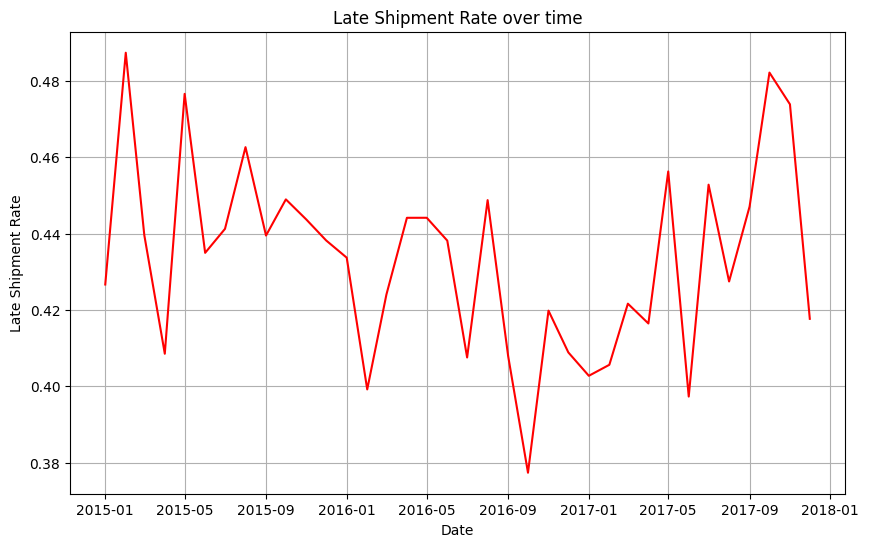

In [196]:
# Calculate the number of late orders and total orders per Product Department
late = order[order['Delay Shipment'] == 'Late'].groupby('Shipment YearMonth').size().reset_index(name='Late Orders')
total = order.groupby('Shipment YearMonth').size().reset_index(name='Total Orders')
late_order = pd.merge(late, total, on='Shipment YearMonth')

#Calculate late shipment rate by product department
late_order['Late Shipment Rate'] = late_order['Late Orders']/late_order['Total Orders']

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#Plotting
sns.lineplot(x='Shipment YearMonth',y = 'Late Shipment Rate', data = late_order, color ='red')

plt.xlabel('Date')
plt.title('Late Shipment Rate over time')
plt.grid(True)

plt.show()

The late shipment rate has ranged from 30% to 50% over time

**Take away:** The high late shipment rate of average 40% over a long time regardless the product departments or geography, which remains concerning and indicates inefficiencies in the supply chain system that need improvement


### **4. Recommendations**

The exploratory analysis managed to identify supply chain issues affecting the business. These supply chain inefficiencies and potential problems, together with proposed recommendations are delt with below.

_**Supply chain inefficiencies and potential problems:**_

- **Sharp decline in revenue and profit in Q4/2017:** This is most probably due to supply chain disruption on the supplier network. Possible causes are delays in sourcing, transportation, distribution or problem with suppliers resulting in the company's ability to replenish its warehouse inventory promptly.

- **Overstocking and Understocking:** We observed that the company often encounters overstock situations, causing excess inventory and high storage costs. There are also scenarios of understocking. These are signs of poor inventory management and control.

- **High late shipment rate:** The company experiences worrisome late shipment rate (30 - 50%), indicating a poor delivery system. This leads to poor customer service, whcih result in shrinking customer base.

_**Tools and Techniques on Inventory Management and Control**_

There are a couple of techniques that the company may use to mitigate supply chain inefficiences.

- **ABC XYZ method for inventory segmentation:**

**ABC segment:** inventory segmentation based on the value contribution of the product name (revenue). The segmentation of ABC method is conducted as follows:

- _**A - High value:**_ Products account for **80%** of total net sales

- _**B - Medium value:**_ Products account for **15%** of the rest

- _**C - Low value:**_ Product names account for **5%** of the rest

**XYZ segment:** inventory segmentation based on the demand volatility. The demand volatility is measured by the coefficient of variation `CV`, which equal the standard deviation divided by the mean value.

- _**X - Regular demand:**_ Products have `CV < 0.25`

- _**Y - Variable/ Seasonal/ Trendy demand:**_ Products have `0.25 <= CV <= 0.5`

- _**Z - Irregular demand:**_ Products have `CV > 0.5`

Based on all the analysis I would like to make some recommendations as follows

**Restore revenue and profit (recommended for each inventory segmentation):**

- The company can find new suppliers and redesigning the supply chain so that the incident of Q4/2017 won’t happen again.

- Further investigation may be conducted to identify where supply chain disruptions are occurring and filtering out suitable alternative suppliers.

- Market research may be conducted to understand current consumption trends and the market's demands for the emerging products.

- Analyze both local and global markets to identify gaps and opportunities is also necessary.

- Forecast customer demand to optimize inventory management is recommended.

- Drop less important segments or reducing their inventory to optimize storage cost.

**Overstocking and Understocking:**

- Demand forecasting: by analyzing historical sales data, tracking market trends, and employing predictive analytics, the company can anticipate future demand, allowing it to maintain an optimal inventory level.

- Economic Order Quantity (EOQ): The company can determine the level of inventory at which the `Total Cost` of inventory is minimum.

- Order Point Problem: setting up reorder points for each product is essential. These points serve as indicators for reordering, factoring in lead time, sales velocity, and desired safety stock levels, ensuring the company replenish stock in a timely manner without risking overstocking. Speaking of safety stock, maintaining this buffer inventory is vital. It acts as a safeguard against unexpected demand fluctuations or supply delays, mitigating the chances of stockouts and the associated revenue loss while also minimizing the risk of excessive stock accumulation.

**High late shipment rate (LSR):**

- Optimization of the delivery system through a redesigned transportation route, such as adopting a cross-docking strategy, can significantly enhance the efficiency of shipments.

- Collaboration with local logistics companies to leverage their existing resources and expertise, especially with markets far away from USA and Peuter Rico.

- Improve overall delivery system and expand the company's global reach by establishing a warehouse in a strategic logistics hub like Singapore in Asia. This move would not only improve the delivery process but also facilitate smoother operations across various international markets.

### **5. Conclusion**

Solving business problems require us to find out the root causes and their sources. Exploratory data analysis (EDA) and Supply chain quality (SCQ) analysis conducted helped reveal the current business situation. By asking relevant business questions, we were able to tap into supply chanin domain knowledge in order to come up with strategies for rectifying the situation.

Supply chain consists of three main components: suppliers - company - customers. Suppliers are at the beginning of the chain, providing the products that the e-commerce company sells. These include manufacturers, distributors, or wholesalers. Supplier relationships, quality control, and timely deliveries are crucial in this supplier network. A key metric that may be used to measure performance at this level is average order fulfillment.

Once the products are received from suppliers, they are stored in warehouses. Inventory management systems track stock levels, reorder points, and storage locations. Efficient warehousing and inventory management helps prevent stockouts while minimizing excess inventory. Important metrics at this stage are: storage cost, warehouse inventory and warehouse location.

After customers place orders, the e-commerce platform's order processing team verifies details, product availability, and shipping preferences before transmitting the information to the warehouse. Staff pick and securely pack items from storage locations, ensuring accuracy and speed to meet customer expectations. The packed orders are then transferred to shipping partners, who may include couriers or carriers, with various options chosen to align with customer delivery expectations. At this point, we focus on delayed shipment, delivery system as well as returned and cancelled orders.

Overall, for the whole supply chain to work efficiently, demand forecasting plays a significant role in supply chain optimization. Historical sales data, customer trends, and market insights can help forecast demand accurately, reducing stockouts and excess inventory.